# Autoencoders



## Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from keras  import layers, losses
from keras.models import Model, Sequential
from keras.datasets import fashion_mnist

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255 

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)


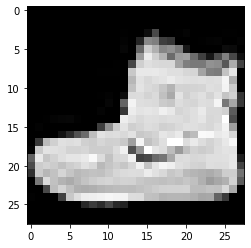

In [4]:
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[0])
plt.gray()

## Basic Autoencoder

In [5]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [6]:
autoencoder = Autoencoder(64)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [29]:
autoencoder.summary() # Only summary for inner models

ValueError: ignored

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

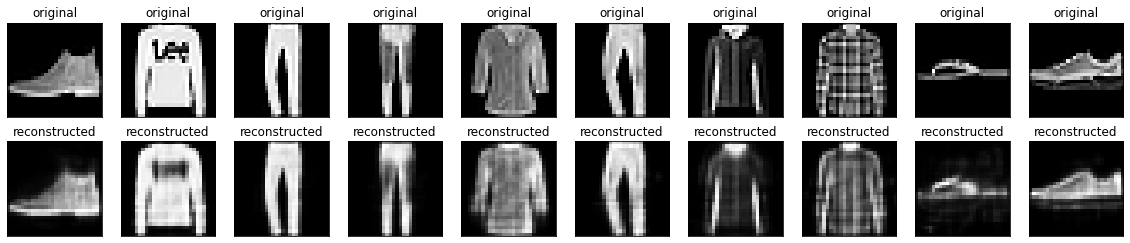

In [9]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Code Hyperparameter

In [10]:
autoencoder = Autoencoder(256)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - val_loss: 0.0079
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.003

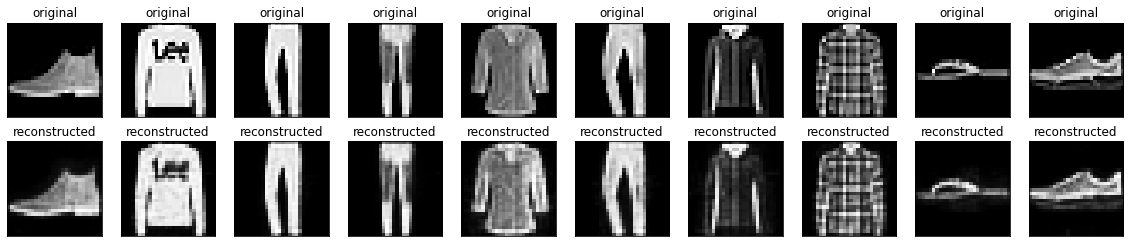

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Image Denoising

In [13]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_train.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


### Adding noise

In [14]:
noisy_x_train = x_train + 0.2 * tf.random.normal(x_train.shape)
noisy_x_test = x_test + 0.2 * tf.random.normal(x_test.shape)

noisy_x_train = tf.clip_by_value(noisy_x_train, clip_value_min=0., clip_value_max=1.)
noisy_x_test = tf.clip_by_value(noisy_x_test, clip_value_min=0., clip_value_max=1.)

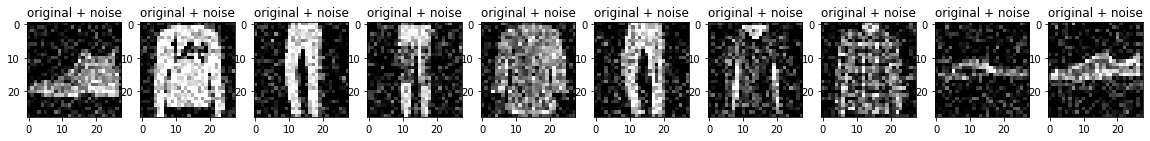

In [15]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(noisy_x_test[i]))
    plt.gray()
plt.show()

In [35]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [36]:
au = Denoise()

In [37]:
au.encoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
Total params: 19,104
Trainable params: 19,104
Non-trainable params: 0
_________________________________________________________________


In [38]:
au.decoder.summary()

ValueError: ignored

In [39]:
au.compile(optimizer='adam', loss=losses.MeanSquaredError())

au.fit(noisy_x_train, x_train, 
       shuffle=True,
       epochs=10,
       validation_data=(noisy_x_test, x_test)
       )

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0102 - val_loss: 0.0063
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

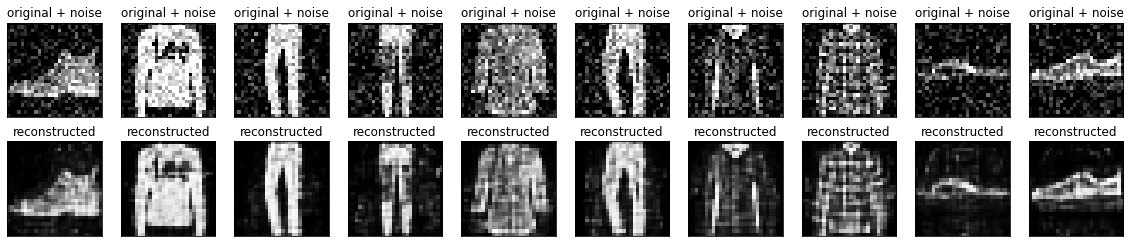

In [41]:
encoded_imgs = autoencoder.encoder(noisy_x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(noisy_x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

#### Note

Main parameter is number of filters, the more the best (at least at some point)

## Deconv Nets

In [55]:
conv = layers.Conv2D(32, (3, 3), 2, 'same')
x = conv(x_train[0:2])
x[0].shape

TensorShape([14, 14, 32])

In [56]:
dconv = layers.Conv2DTranspose(32, 3, 2, 'same')
x = dconv(x)
x[0].shape

TensorShape([28, 28, 32])

In [57]:
dconv2 = layers.Conv2DTranspose(1, 3, 1, 'same')
x = dconv2(x)
x[0].shape

TensorShape([28, 28, 1])

## Anomaly Detection

Bassically the idea is to reconstruct ECG data. The dataset contains normal and anormal rythims, to detect anomalies the theory is to learn to reconstruct only normal rythims, then, anormal rythims will have bigger reconstruction errors. Therefore, it is possible to classify anomalies by discriming reconstruction errors with a threshold.

In [58]:
# Download the dataset ECG
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [59]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [60]:
# Normalizing data

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [67]:
# Autoencoder will be trained using only normal rythims

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Text(0.5, 1.0, 'A normal ECG')

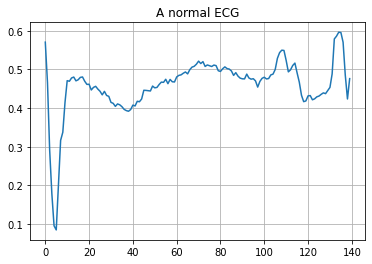

In [66]:
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.title('A normal ECG')


Text(0.5, 1.0, 'A anomalous ECG')

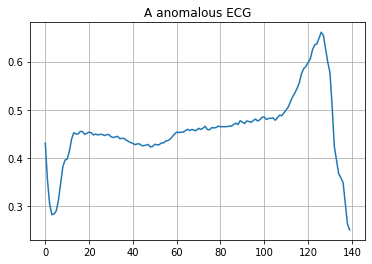

In [68]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title('A anomalous ECG')


In [71]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu')
    ])

    self.decoder = Sequential([
        layers.Dense(8, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(140,activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
autoencoder = AnomalyDetector()

In [72]:
autoencoder.compile(optimizer='adam', loss='mae')

In [74]:
# Train with normal, validate with all data

history = autoencoder.fit(normal_train_data, normal_train_data,
                batch_size=512,
                epochs=20,
                shuffle=True,
                validation_data=(test_data, test_data)
                )

Epoch 1/20
5/5 [==============================] - 5s 48ms/step - loss: 0.0571 - val_loss: 0.0529
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0539 - val_loss: 0.0514
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0500 - val_loss: 0.0488
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0459 - val_loss: 0.0465
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0420 - val_loss: 0.0440
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0385 - val_loss: 0.0419
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0355 - val_loss: 0.0402
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0329 - val_loss: 0.0390
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0306 - val_loss: 0.0378
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0286 - val_loss: 0.0367
Epoch 11/20
5/5 [============

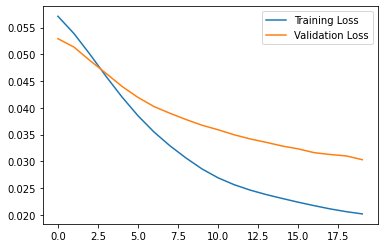

In [75]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

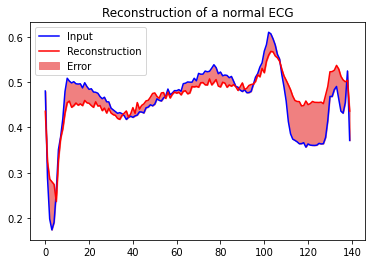

In [80]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.title('Reconstruction of a normal ECG')
plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


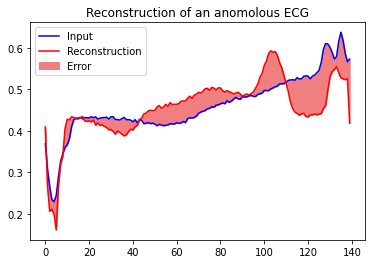

In [81]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.title('Reconstruction of an anomolous ECG')
plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 2ms/step


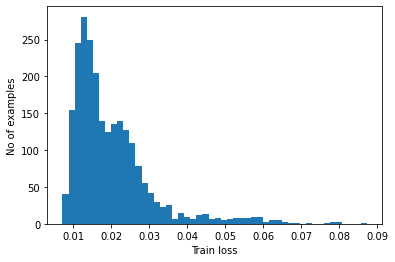

In [82]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [83]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.030616418


14/14 [==============================] - 0s 3ms/step


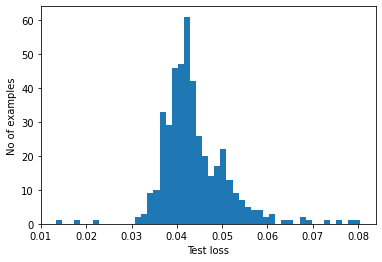

In [84]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [85]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [86]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.938
Precision = 0.9940476190476191
Recall = 0.8946428571428572
